In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [350]:
iris = pd.read_csv("iris.data", header=None)
iris.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"]
print(iris['Class'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64


In [351]:
iris.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Class          0
dtype: int64

In [352]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [353]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Class
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

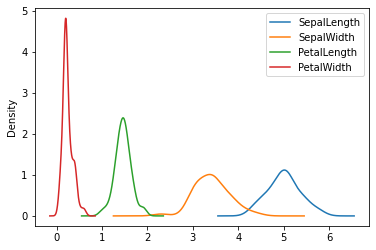

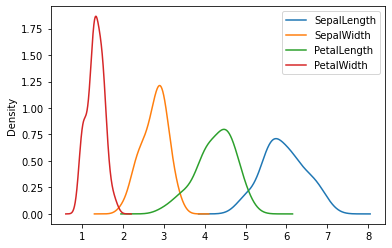

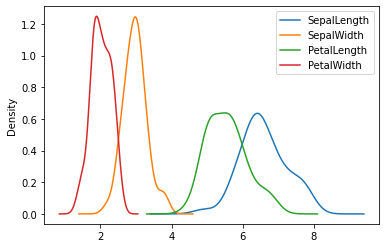

In [354]:
iris.groupby('Class').plot(kind='kde')

<AxesSubplot:xlabel='SepalLength', ylabel='Probability'>

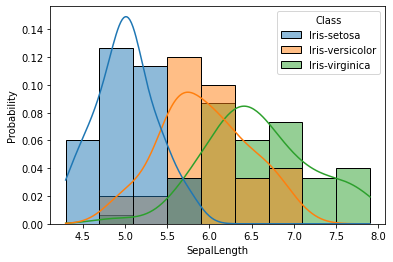

In [355]:
sns.histplot(data=iris, x='SepalLength', hue='Class', alpha=0.5, kde=True, stat='probability')

<AxesSubplot:>

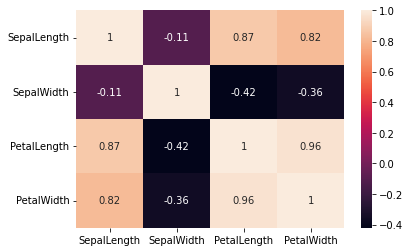

In [356]:
sns.heatmap(iris.corr(), annot=True)

In [357]:
from sklearn.preprocessing import LabelEncoder

iris['Class'] = LabelEncoder().fit_transform(iris['Class'])
iris['Class'].head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

In [358]:
from sklearn.preprocessing import MinMaxScaler
normalized_iris = MinMaxScaler().fit_transform(iris.drop(columns=['Class']))
normalized_iris = pd.DataFrame(normalized_iris)
normalized_iris['Class'] = iris['Class']
normalized_iris.columns = iris.columns
normalized_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [359]:
normalized_iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778,1.000000
std,0.230018,0.180664,0.299054,0.317984,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


In [360]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(normalized_iris.drop('Class', axis=1), normalized_iris['Class'], test_size=0.2, shuffle=True)

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [361]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=2)
selector.fit(x_train, y_train)
best_features = selector.get_feature_names_out()
x_train[best_features].head()

,PetalLength,PetalWidth
0,0.627119,0.583333
1,0.576271,0.541667
2,0.694915,0.583333
3,0.423729,0.375000
4,0.694915,0.625000


In [362]:
selected_x_train = x_train[best_features]
selected_x_test = x_test[best_features]

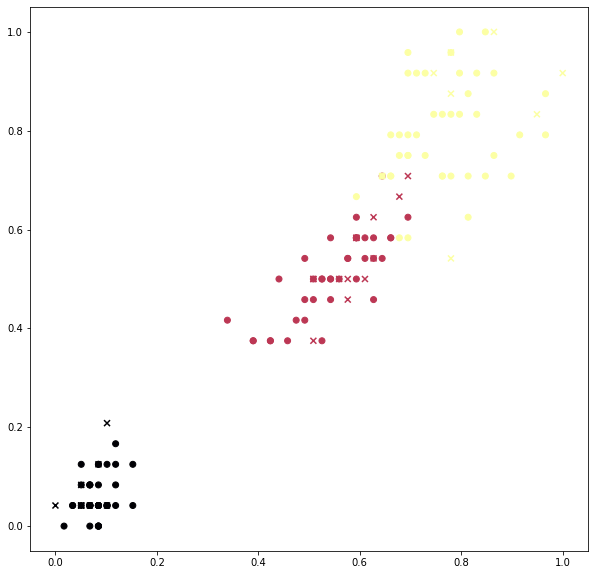

In [381]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='mahalanobis', metric_params={'V': np.cov(selected_x_train.T)})
knn.fit(selected_x_train, y_train)
predict = knn.predict(selected_x_test)

plt.figure(figsize=(10, 10))
plt.scatter(selected_x_train['PetalLength'], selected_x_train['PetalWidth'], c=y_train, cmap='inferno')
plt.scatter(selected_x_test['PetalLength'], selected_x_test['PetalWidth'], c=predict, marker='x', cmap='inferno')
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        12
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



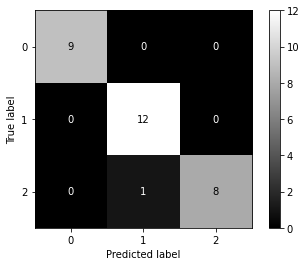

In [382]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

cm = confusion_matrix(y_test, predict)
ConfusionMatrixDisplay(cm).plot(cmap='gray')
print(classification_report(y_test, predict))

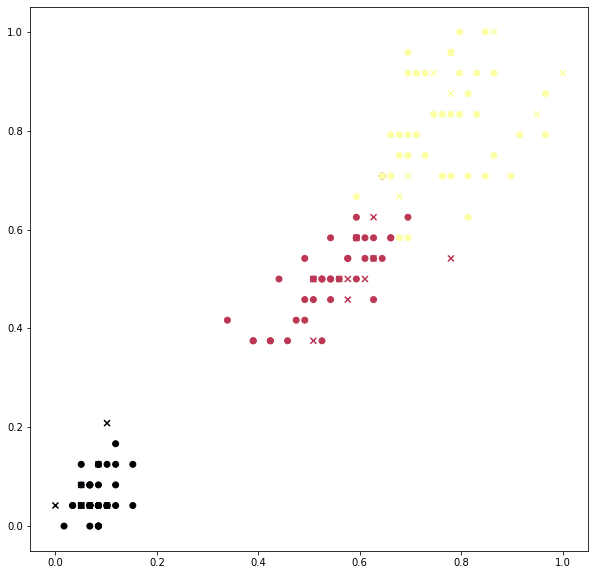

In [384]:
from sklearn.neighbors import NearestCentroid

nc = NearestCentroid()

nc.fit(selected_x_train, y_train)
predict = nc.predict(selected_x_test)

plt.figure(figsize=(10, 10))
plt.scatter(selected_x_train['PetalLength'], selected_x_train['PetalWidth'], c=y_train, cmap='inferno')
plt.scatter(selected_x_test['PetalLength'], selected_x_test['PetalWidth'], c=predict, marker='x', cmap='inferno')
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        12
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



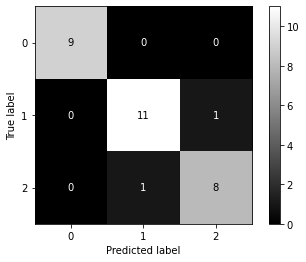

In [385]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

cm = confusion_matrix(y_test, predict)
ConfusionMatrixDisplay(cm).plot(cmap='gray')
print(classification_report(y_test, predict))